<a href="https://colab.research.google.com/github/ElgunBabayev1/Machine-Learning/blob/main/California_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

In [ ]:
# Load data
url = "https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv"
housing = pd.read_csv(url)

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
housing.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
# Data exploration
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


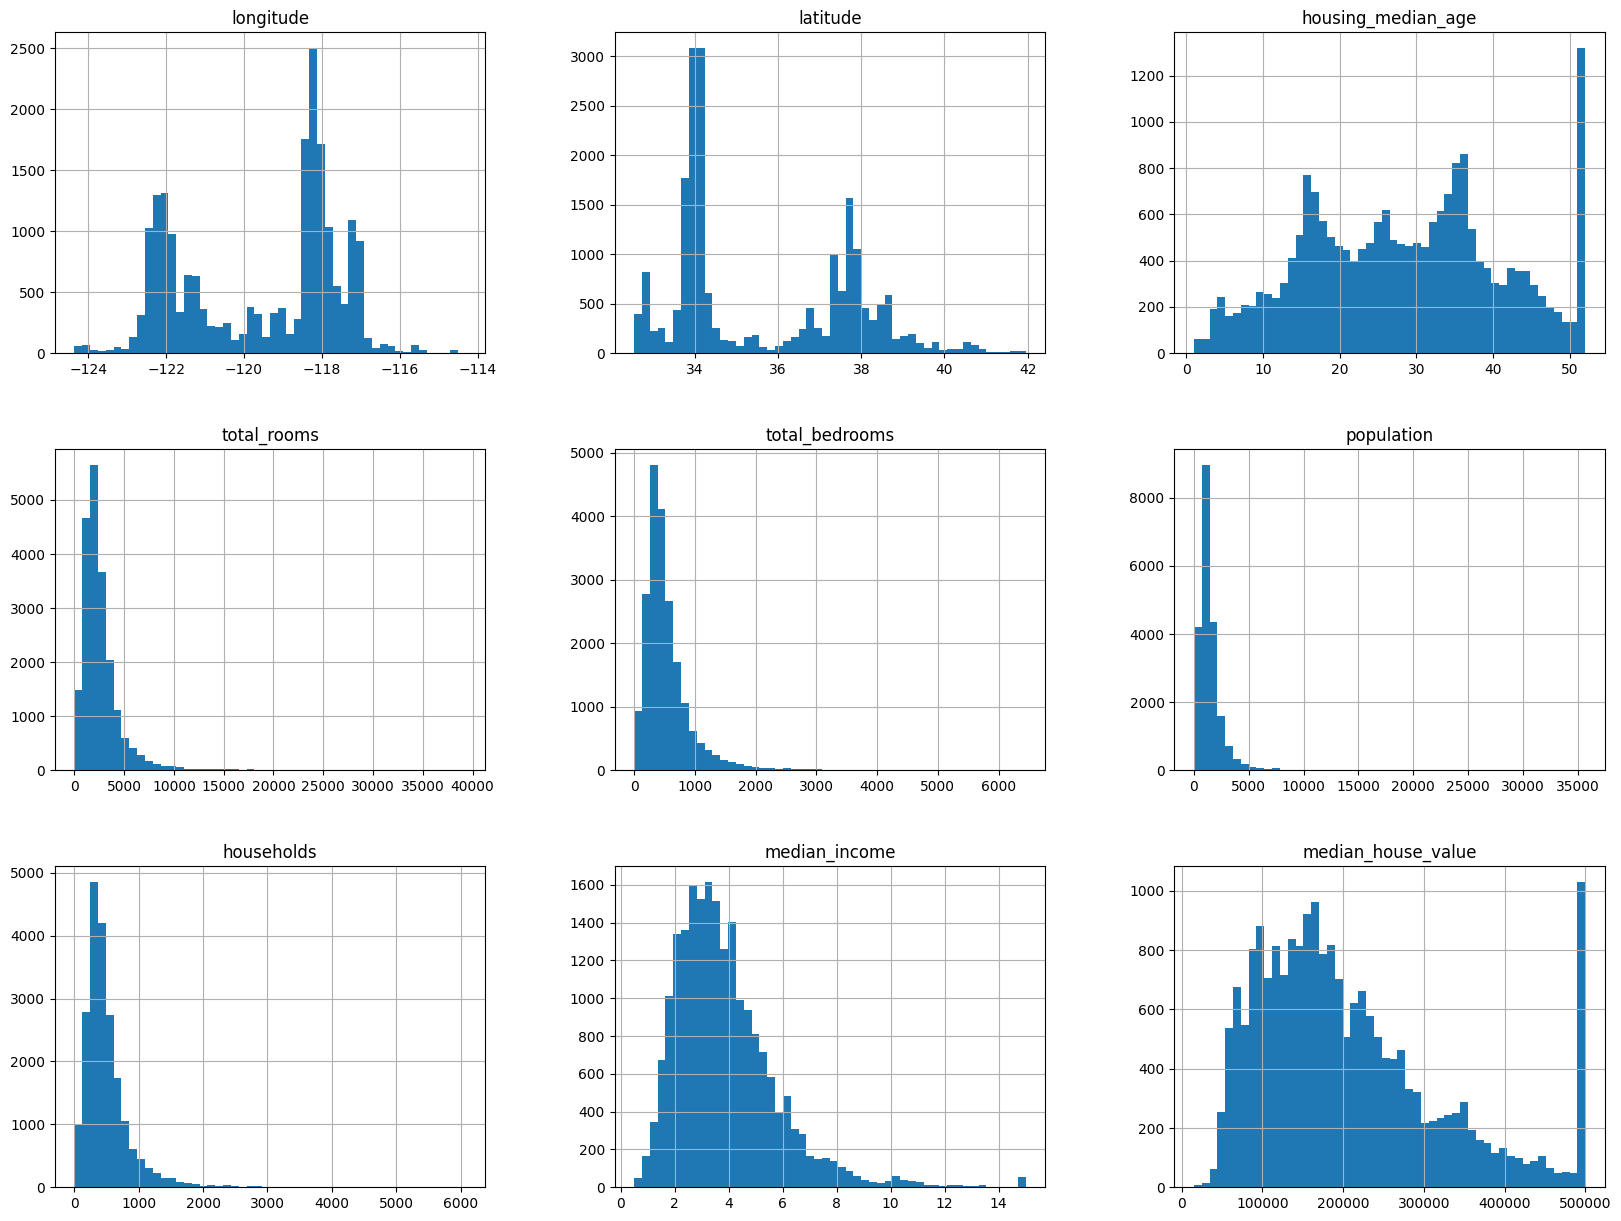

In [ ]:
# Histograms
housing.hist(bins=50, figsize=(20, 15))
plt.show()

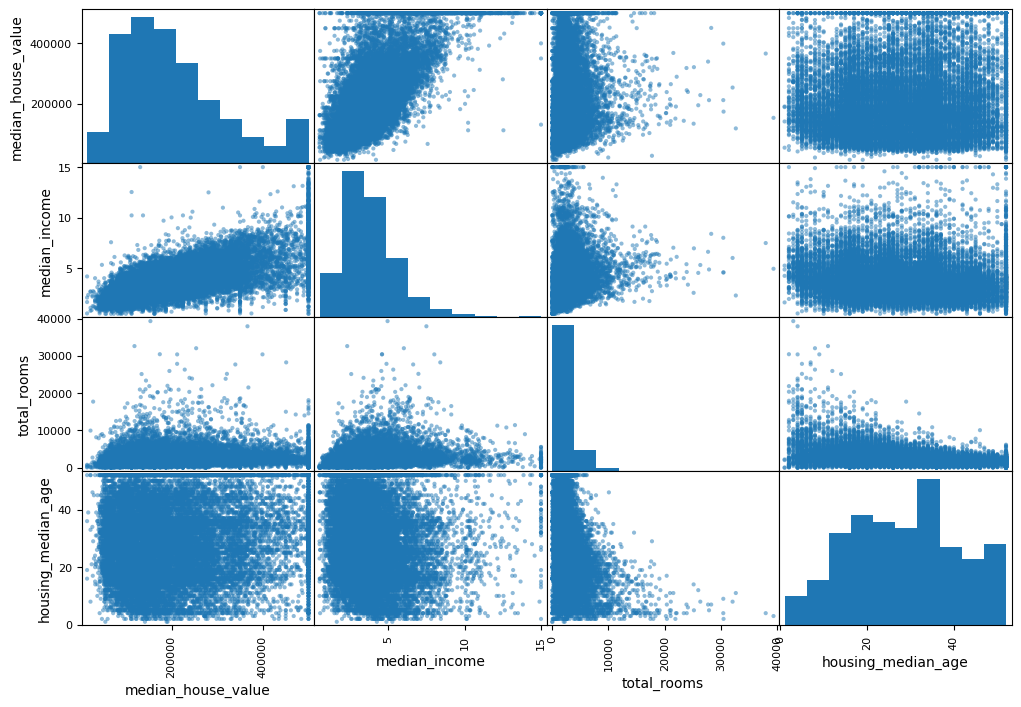

In [ ]:
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8));

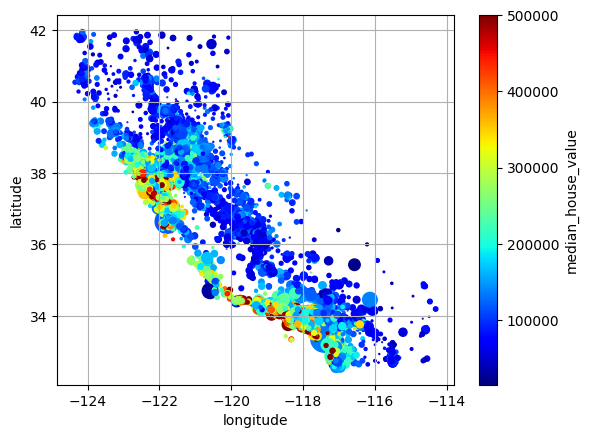

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True,c='median_house_value',cmap='jet',colorbar=True,s=housing['population']/100);

In [ ]:
# Correlation analysis
correlation_matrix = housing.corr(numeric_only=True)
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


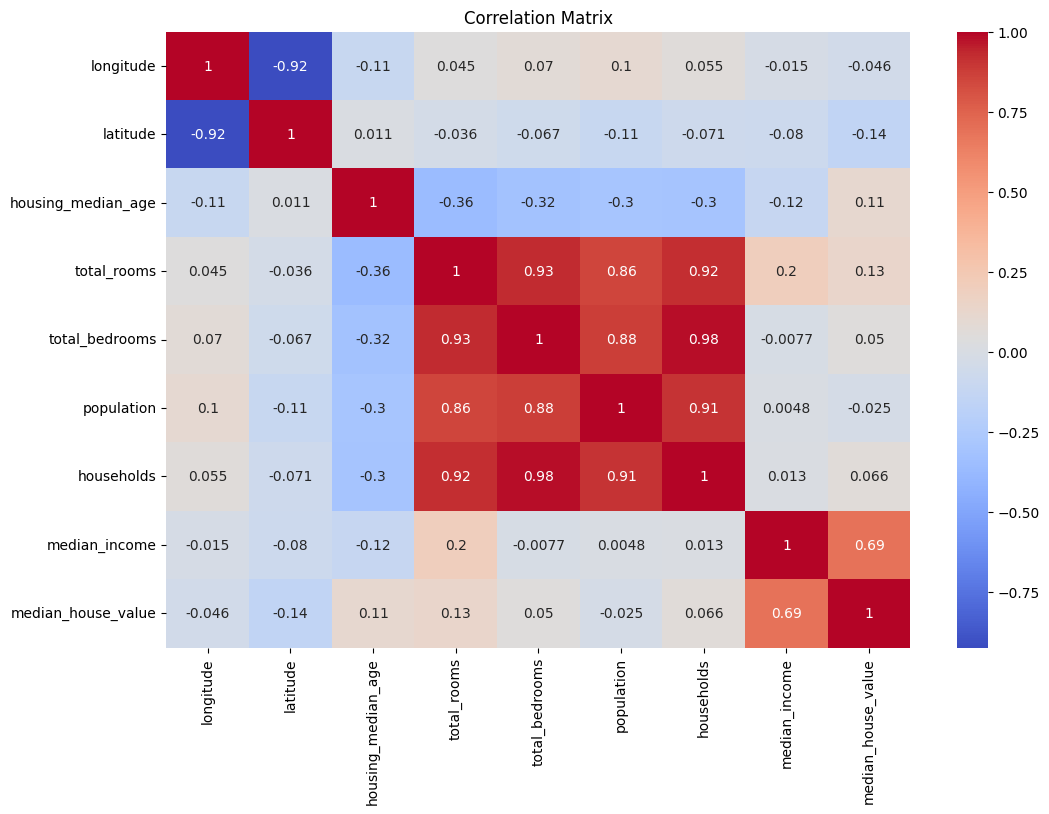

In [ ]:
# Heatmap to visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
housing['total_bedrooms']=housing['total_bedrooms'].fillna(housing['total_bedrooms'].median())

In [ ]:
# Feature engineering
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [ ]:
# Correlation analysis
correlation_matrix = housing.corr(numeric_only=True)
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.233303
Name: median_house_value, dtype: float64


<Axes: xlabel='income_cat'>

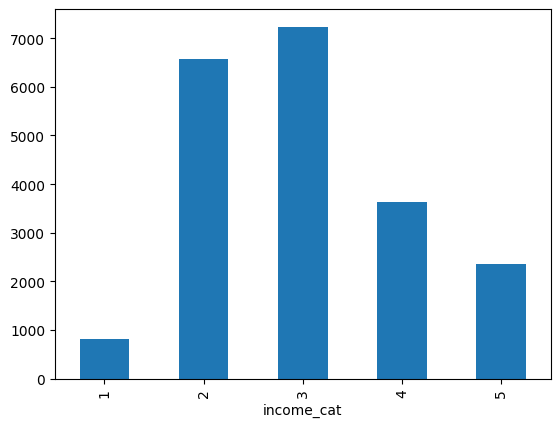

In [ ]:
# Stratified sampling based on median_income
housing['income_cat'] = pd.cut(housing['median_income'],
                          bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                          labels = [1, 2, 3, 4, 5])

housing['income_cat'].value_counts().sort_index().plot(kind = 'bar')

In [ ]:
X = housing.drop(['median_house_value', 'income_cat'], axis=1)
y = housing['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [ ]:
# Selecting numerical and categorical features
num_features = X_train.select_dtypes(include=[np.number]).columns
cat_features = X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
# Pipelines for preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [ ]:
# List of models to test
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [ ]:
# Evaluate models
results = {}
for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R2 Score': r2}

In [ ]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                           RMSE  R2 Score
Linear Regression  71894.401016  0.613864
Decision Tree      70529.908093  0.628382
Random Forest      50264.161316  0.811259
Gradient Boosting  53644.261087  0.785021


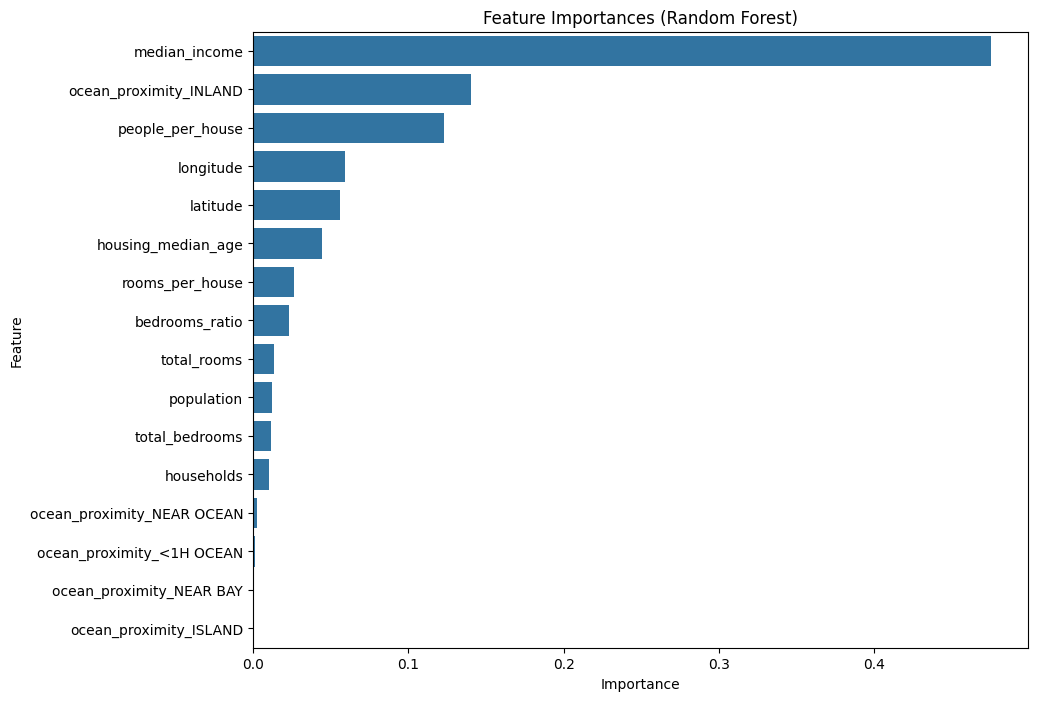

In [ ]:
# Feature importance visualization for Random Forest
rf_model = models['Random Forest']
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])
rf_pipeline.fit(X_train, y_train)
if hasattr(rf_model, 'feature_importances_'):
    feature_importances = rf_model.feature_importances_
    feature_names = num_features.tolist() + list(rf_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(cat_features))
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importances (Random Forest)')
    plt.show()

In [ ]:
# Grid search for Random Forest
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 10, 20]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedrooms_ratio', '...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['ocean_proximity'], dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, None],
                         'model__min_samples_split': [2, 10, 20],
                         'model__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best Random Forest evaluation
best_rf_model = grid_search.best_estimator_
best_y_pred = best_rf_model.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, best_y_pred))
best_r2 = r2_score(y_test, best_y_pred)
print(f"Best Random Forest RMSE: {best_rmse}")
print(f"Best Random Forest R2 Score: {best_r2}")

Best Random Forest RMSE: 50384.67160432321
Best Random Forest R2 Score: 0.8103524341050596
